# Data Story: Medium employee data

In this notebook we explore human resources data provided by Medium on Kaggle (https://www.kaggle.com/ludobenistant/hr-analytics). It is simulated employee data of 15000 employees, and the goal is to understand something about what might cause an employee to prematurely leave the company.

In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from __future__ import print_function

In [4]:
sns.set_context("talk")

## Read in data, check for missing values

In [5]:
#data is comma-delimited csv, with headers in the first line
df = pd.read_csv('HR_comma_sep.csv')

In [6]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

We have lots of interesting information that might impact an employee's attitudes. We have direct measures of her general happiness level (satisfaction_level) and her employer's attitude about her (last_evaluation). A measure of workload can be gauged from number of projects and average monthly hours. A measure of rewards from the employer can be found in salary and number of promotions in the last 5 years. Her status in the company could be gleaned from her salary level, department, time spent at the company, and number of projects. 

Let's now take a look at the data itself, and do any preprocessing if necessary.

In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [9]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [10]:
#any null data?
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [11]:
#what are possible values for sales
set(df.sales)

{'IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical'}

In [12]:
#what are possible values for salary
set(df.salary)

{'high', 'low', 'medium'}

The data is pretty clean. There is no missing data, and formats are all sensible. Ratings are already normalized to be between 0 and 1. We're ready to start looking for interesting features in the data!

## Data Exploration

### Satisfaction level

Satisfaction level, as seen in the plot below, is mostly average or high, with a spike of people who are disatisfied with a ranking of 0.1.

<IPython.core.display.Javascript object>


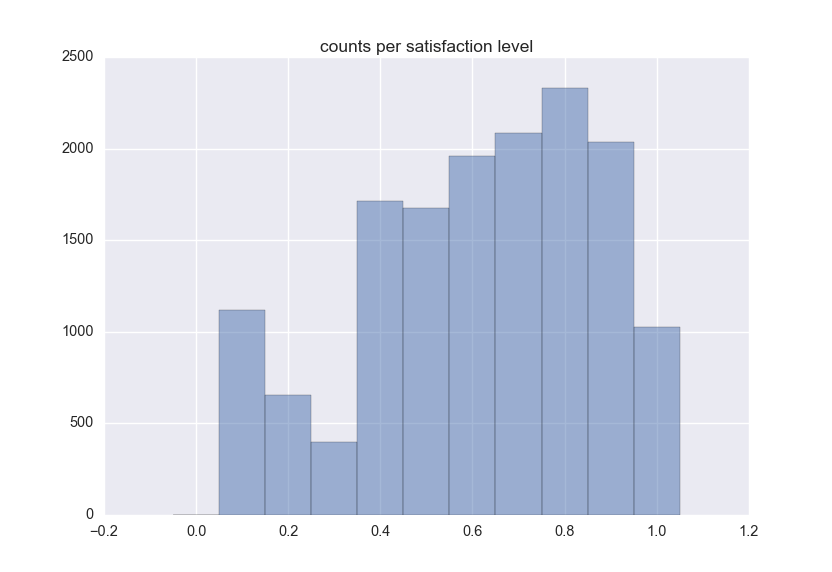

In [13]:
#distribution of satisfaction levels
bins = np.arange(-.05, 1.15, 0.1)
plt.figure()
plt.hist(df.satisfaction_level, bins, alpha=0.5)
plt.title('counts per satisfaction level')
plt.show()

The variable that is our target is whether the employee left (left), let's look at if there is any correlation between her satisfaction level, and leaving.

<IPython.core.display.Javascript object>


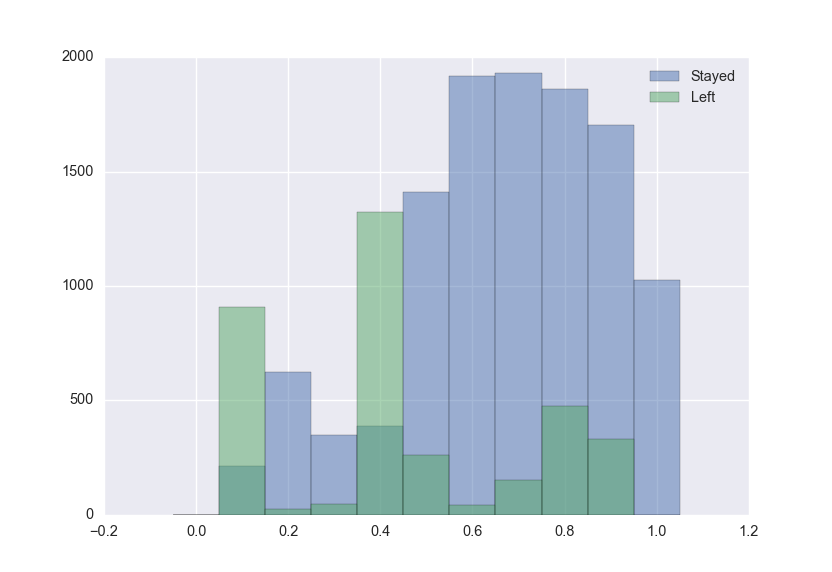

In [14]:
# let's plot two histograms, satisfaction level of those who have stayed, and those who left.
bins = np.arange(-.05, 1.15, 0.1)
df_left = df[df.left == 1]
df_stay = df[df.left == 0]
plt.figure()
plt.hist(df_stay.satisfaction_level, bins, alpha=0.5, label='Stayed')
plt.hist(df_left.satisfaction_level, bins, alpha=0.5, label='Left')
plt.legend(loc='upper right')
plt.show()

The majority of people who ranked their satisfaction as under 0.5 do leave, but it's not straightforward - the majority of people who ranked their satisfaction as 0.1 or 0.4 leave, but the majority of people who ranked their satisfaction as 0.2 or 0.3 stayed. The story is more complicated than just satisfaction levels. 

## last evaluation

The complement to employee satisfaction is employer satisfaction. An employee might feel dissatisfied if they feel they are not doing well, which might be reflected in a poor evaluation. Alternatively, a bored or unhappy employee might not be engaged which results in a poor evaluation, Can we see signals of these possible scenarios? Is there a correlation between an employee's last evaluation and leaving?

<IPython.core.display.Javascript object>


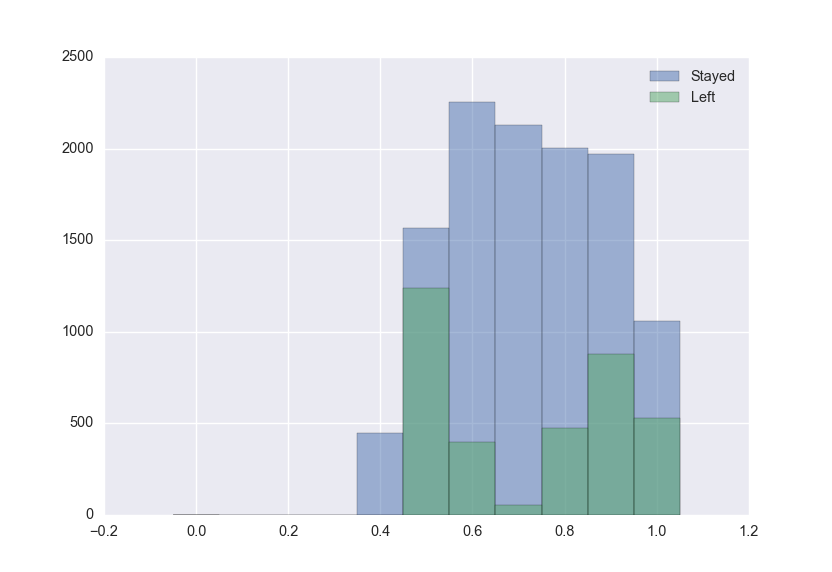

In [15]:
bins = np.arange(-.05, 1.15, 0.1)
df_left = df[df.left == 1]
df_stay = df[df.left == 0]
plt.figure()
plt.hist(df_stay.last_evaluation, bins, alpha=0.5, label='Stayed')
plt.hist(df_left.last_evaluation, bins, alpha=0.5, label='Left')
plt.legend(loc='upper right')
plt.show()

The distribution of people who leave seems to have two peaks - people who earn the lowest scores, and then people who earn very high scores. Do these two groups leave for different reasons?

## Promotion

An additional feedback from an employer with their satisfaction with you is promotion. Do more people leave who haven't had a promotion?

In [16]:
#How many people get promotions?
df.groupby([df.promotion_last_5years,df.left]).size()

promotion_last_5years  left
0                      0       11128
                       1        3552
1                      0         300
                       1          19
dtype: int64

In [17]:
print(319/14999)
print(19/(300+19))
print(3552/(11128+3552))
print((3552+19)/14999)

0.021268084538969265
0.05956112852664577
0.24196185286103541
0.2380825388359224


Only 2% of people get promotions. And out of those who get promoted, only 5% leave. Otherwise, almost a quarter of people leave.

## Average monthly hours

Long working hours can indicate high engagement in one's work, but can also lead to burn out. Is there a correlation between work hours and satisfaction, or leaving? 

<IPython.core.display.Javascript object>


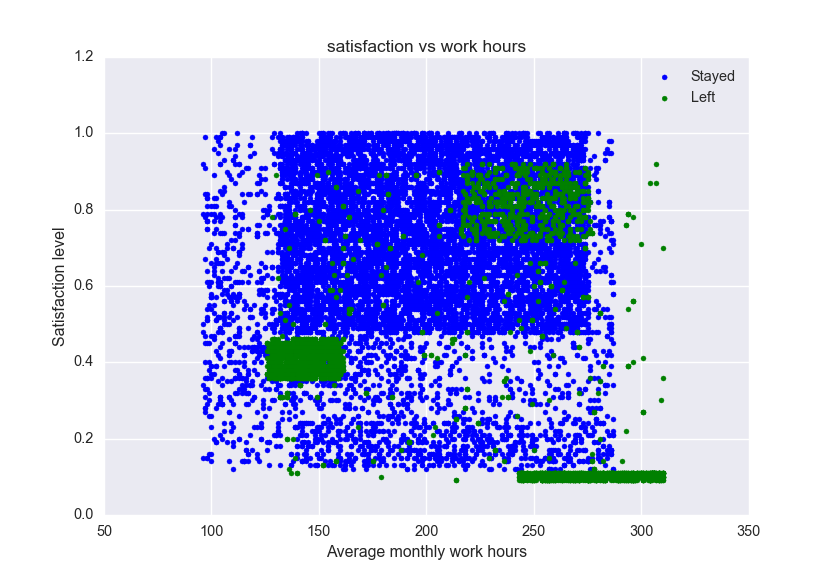

In [18]:
#distribution of number of projects
plt.figure()
plt.scatter(df_stay.average_montly_hours.values,df_stay.satisfaction_level.values, color='b', label='Stayed')
plt.scatter(df_left.average_montly_hours.values,df_left.satisfaction_level.values, color='g', label='Left')
plt.legend()
plt.xlabel('Average monthly work hours')
plt.ylabel('Satisfaction level')
plt.title('satisfaction vs work hours')

There definitely seems to be grouping of people who are working overtime and have low satisfaction, those who are working part-time and have midlevel satisfaction, and those that work overtime but have high satisfaction. Is there a correlation between these groupings and department, or number of projects?

### Department

Are these patterns in satisfaction, work hours and leaving partitioned by department? As the plots below show, that does not seem to be the case. There are representatives in all three clusters of leavers in each department.

<IPython.core.display.Javascript object>


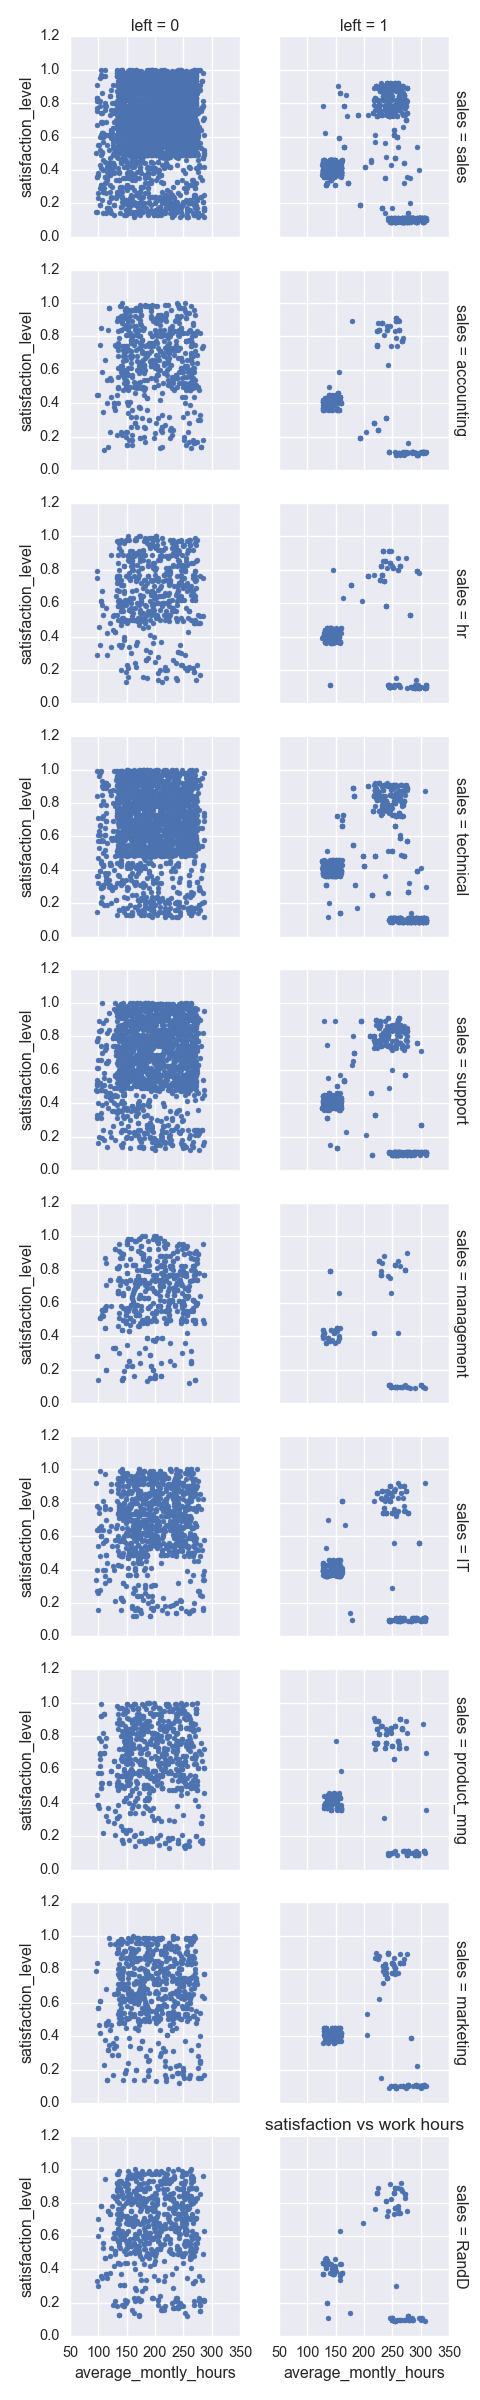

In [19]:
# satisfaction vs work hours for each  
g = sns.FacetGrid(df, row="sales", col="left", margin_titles=True)
g.map(plt.scatter, "average_montly_hours", "satisfaction_level")
plt.title('satisfaction vs work hours')

## Number of projects

Do the three clusters of leavers partition over number of projects? As the plots below show, yes!

<IPython.core.display.Javascript object>


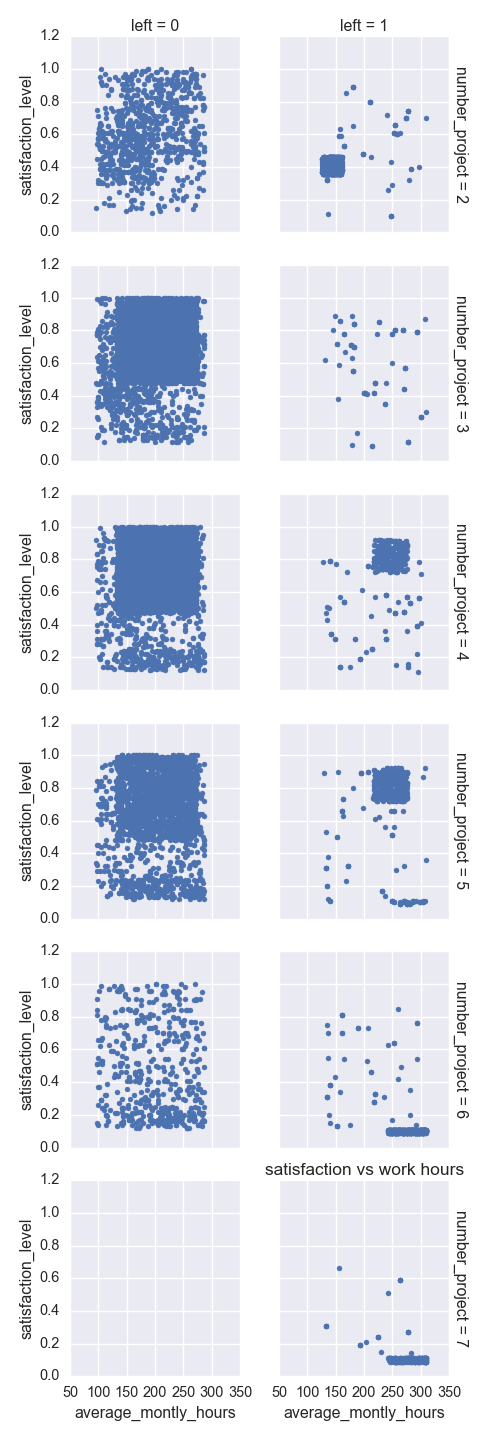

In [20]:
# satisfaction vs work hours for number of projects  
g = sns.FacetGrid(df, row="number_project", col="left", margin_titles=True)
g.map(plt.scatter, "average_montly_hours", "satisfaction_level")
plt.title('satisfaction vs work hours')